# SASHENIRAOD.C1 Plots

[Click here](https://www.arm.gov/capabilities/vaps/aod) for more information about this vap.

In [1]:
%matplotlib widget
import ipywidgets as widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd
import os
from datetime import datetime

import act
import xarray as xr

# Data archive directory
DATA_DIR = r'/data/archive/'

# Datastream info
DATASTREAM_NAME = 'sasheniraod'
DATA_LEVEL = 'c1'
LOCATIONS = [{'end_date': '2022-10-01', 'facility': 'M1', 'site': 'hou', 'start_date': '2021-09-21'}, {'end_date': '2015-12-01', 'facility': 'M1', 'site': 'mao', 'start_date': '2014-01-01'}, {'end_date': '2013-06-21', 'facility': 'M1', 'site': 'pvc', 'start_date': '2012-06-27'}, {'end_date': '2019-07-27', 'facility': 'C1', 'site': 'sgp', 'start_date': '2011-03-22'}]

## Define site, facility, and date range

In [2]:
print("The following locations and date ranges are available for this VAP:")
display(pd.DataFrame(LOCATIONS, columns=['site', 'facility', 'start_date', 'end_date']))

The following locations and date ranges are available for this VAP:


,site,facility,start_date,end_date
0,hou,M1,2021-09-21,2022-10-01
1,mao,M1,2014-01-01,2015-12-01
2,pvc,M1,2012-06-27,2013-06-21
3,sgp,C1,2011-03-22,2019-07-27


#### Define site, facility, and date range (date format: YYYY-MM-DD) using the variables below:

In [3]:
site_facility = ( 'sgp', 'C1' )

date_start = '2019-07-26'
date_end = '2019-07-26'

## Load data files
Load data files from /data/archive/

In [4]:
# Compile list of files
site, facility = site_facility
d_date_start = datetime.strptime(date_start, '%Y-%m-%d')
d_date_end = datetime.strptime(date_end, '%Y-%m-%d')
dir_path = os.path.join(DATA_DIR + site, site + DATASTREAM_NAME + facility + r'.' + DATA_LEVEL )
dir_path


'/data/archive/sgp/sgpsasheniraodC1.c1'

In [5]:
from datetime import date, timedelta
import pandas as pd

def get_ARM_formated_dates(start_date, end_date):
    """
    Get a list of ARM conventional formated date lists, based on start_date and end_date(inclusive)
    EXAMPLE:
    get_ARM_formated_dates(start_date="20180219", end_date="20180221")
    >> ["20180219", "20180220", "20180221"] 
    """
    
    _start_date = pd.to_datetime(start_date)
    _end_date = pd.to_datetime(end_date)
    
    delta = _end_date - _start_date   # returns timedelta    
    dates = []

    for i in range(delta.days + 1):
        day = _start_date + timedelta(days=i)
        day_formated = day.strftime(format="%Y%m%d")
        dates.append(day_formated)
    return dates


get_ARM_formated_dates(start_date=date_start, end_date=date_end)

['20190726']

In [6]:
# Filter a list of files based on date pattern
import glob
dates = get_ARM_formated_dates(start_date=date_start, end_date=date_end)
files_filter = []
for date in dates:
    files_filter += glob.glob(f'{dir_path}/*.{date}*.*')
    files_filter
files_filter

['/data/archive/sgp/sgpsasheniraodC1.c1/sgpsasheniraodC1.c1.20190726.113227.nc']

In [7]:
# Load files as a single dataset
files_list = files_filter 
ds = act.io.armfiles.read_netcdf(files_list)
ds.clean.cleanup()
print(f'{len(files_list)} files loaded')
ds


1 files loaded


<xarray.Dataset>
Dimensions:                             (time: 1398, wavelength: 256,
                                         Io_time: 57)
Coordinates:
  * time                                (time) datetime64[ns] 2019-07-26T11:3...
  * wavelength                          (wavelength) float32 900.7 ... 1.823e+03
  * Io_time                             (Io_time) object 2019-06-22 00:00:00 ...
Data variables: (12/29)
    base_time                           datetime64[ns] 2019-07-26T06:00:00
    time_offset                         (time) datetime64[ns] 2019-07-26T11:3...
    Io_values                           (Io_time, wavelength) float32 dask.array<chunksize=(57, 256), meta=np.ndarray>
    Io_values_std                       (Io_time, wavelength) float32 dask.array<chunksize=(57, 256), meta=np.ndarray>
    smoothed_Io_values                  (wavelength) float32 dask.array<chunksize=(256,), meta=np.ndarray>
    qc_smoothed_Io_values               (wavelength) int32 dask.array<chunksize=(256,), meta=np.ndarray>
    ...                                  ...
    normalized_atmospheric_variability  (time) float32 dask.array<chunksize=(1398,), meta=np.ndarray>
    aerosol_optical_depth               (time, wavelength) float32 dask.array<chunksize=(1398, 256), meta=np.ndarray>
    qc_aerosol_optical_depth            (time, wavelength) int32 dask.array<chunksize=(1398, 256), meta=np.ndarray>
    lat                                 float32 ...
    lon                                 float32 ...
    alt                                 float32 ...
Attributes: (12/16)
    command_line:          sashe_aod -s sgp -f C1 -b 20190726 -R
    Conventions:           ARM-1.1
    process_version:       vap-sashe_aod-1.3-0.el6
    dod_version:           sasheniraod-c1-1.2
    input_datastreams:     sgpsashenirhisunC1.a0 : 1.4 : 20190726.000005-2019...
    site_id:               sgp
    ...                    ...
    datastream:            sgpsasheniraodC1.c1
    history:               created by user dsmgr on machine ruby at 2019-08-3...
    _file_dates:           ['20190726']
    _file_times:           ['113227']
    _datastream:           sgpsasheniraodC1.c1
    _arm_standards_flag:   1

## Plot time series data
#### Define the list of variables to be plotted:

In [8]:
variables_to_plot = ['diffuse_transmittance', 'direct_normal_transmittance', 'aerosol_optical_depth']

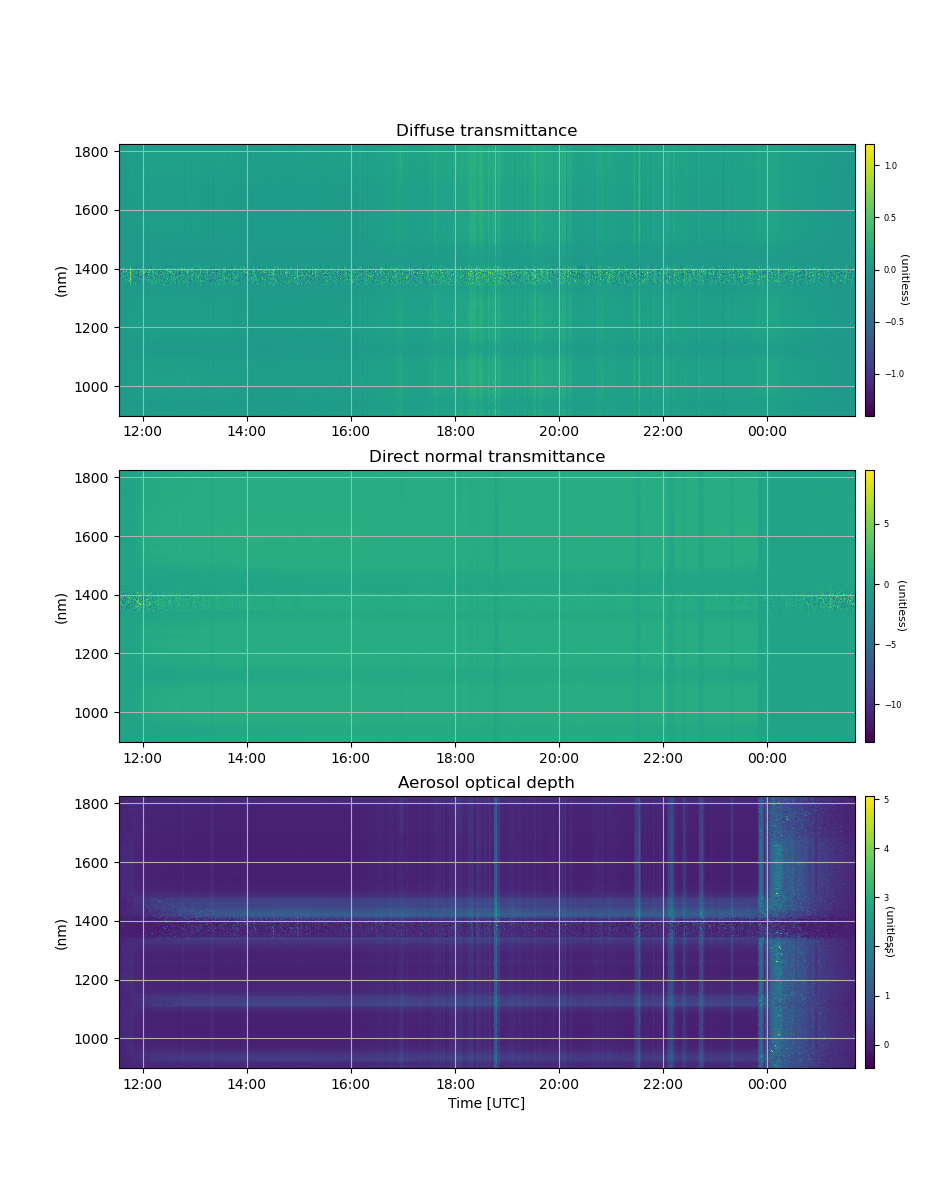

In [9]:
ts_display = act.plotting.TimeSeriesDisplay(ds)
ts_display.add_subplots((len(variables_to_plot),), figsize = (9.5,4*len(variables_to_plot)))

for i,v in enumerate(variables_to_plot):
    ts_ax = ts_display.plot(v, subplot_index=(i,), set_title=ds.variables[v].attrs['long_name'],)
    ts_ax.grid()

plt.show()


## Quality check plots
#### Define variable for QC plot

In [10]:
qc_variable = 'aerosol_optical_depth'

/home/kefeimo/.conda/envs/jupyter-vaps/lib/python3.8/site-packages/act/utils/datetime_utils.py:136: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(np.diff(time))


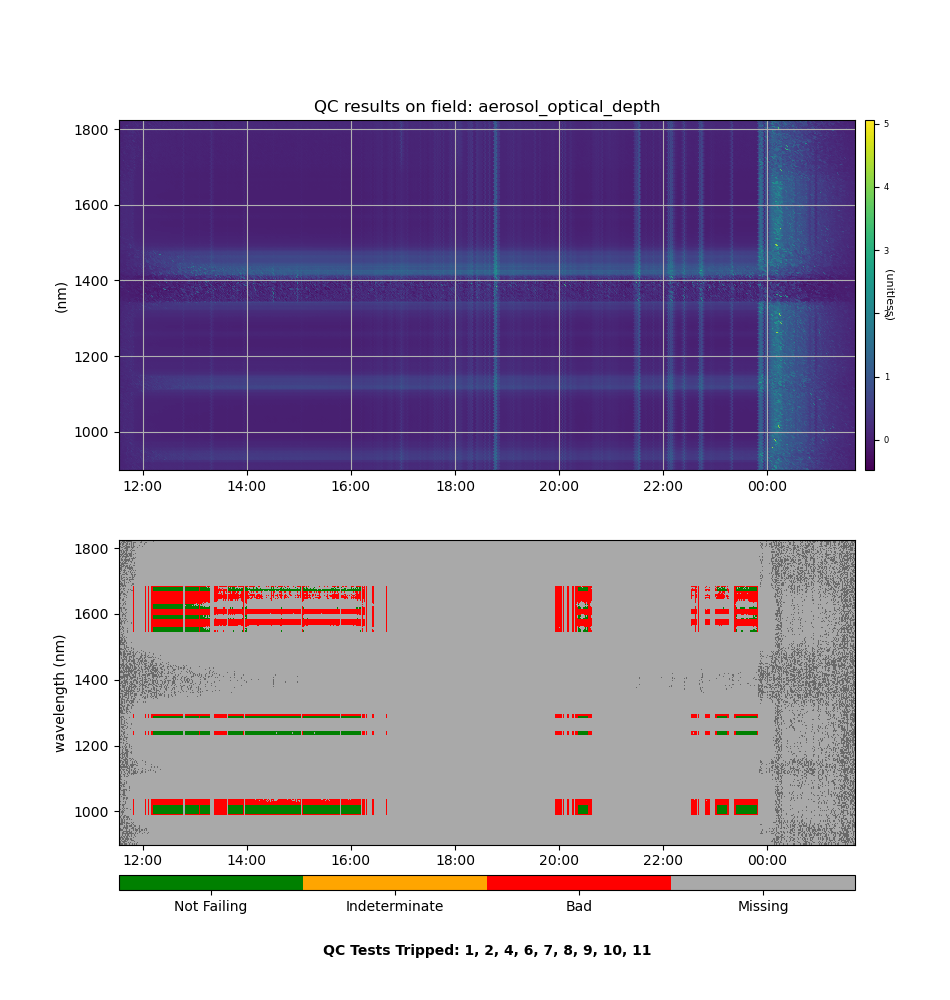

In [11]:
# QC Plot
if ('qc_'+qc_variable) in ds.variables:

    # Plot
    qc_display = act.plotting.TimeSeriesDisplay(ds)
    qc_display.add_subplots((2,), figsize = (9.5,10))
    qc_ax = qc_display.plot(qc_variable, subplot_index=(0,), set_title="QC results on field: " + qc_variable,)
    qc_ax.grid()
    qc_display.qc_flag_block_plot(qc_variable, subplot_index=(1,))

    plt.show()
else:
    print(f'QC not available for the selected field: {qc_variable}')


## Field selection dropdown menu
Select variable to be plotted from a dropdown menu

In [12]:
plt.ioff()

# populate dropdown menu with available variables 
available_variables = [v for v in ds.variables if not('time' in v or v.startswith('qc_') or v.startswith('source_')) and 'long_name' in ds.variables[v].attrs]
d_variable = 'diffuse_transmittance'
dropdown = widgets.Dropdown(
    options = [(ds.variables[v].attrs['long_name'], v) for v in available_variables],
    value= d_variable,
    description='Field:',
    disabled=False,
)
dropdown.layout.margin = '0px 30% 0px 20%'
dropdown.layout.width = '50%'

# set up display
i_display = act.plotting.TimeSeriesDisplay(ds)
i_display.add_subplots((1,), figsize = (9.5,5))
i_ax = i_display.plot(d_variable, subplot_index=(0,), set_title=ds.variables[d_variable].attrs['long_name'],)
i_ax.grid()
i_fig = i_display.fig

# update plot callback function
def update_plot(change):
    i_ax.cla()
    i_ax_new = i_display.plot(change.new, subplot_index=(0,), set_title=ds.variables[change.new].attrs['long_name'],)
    i_ax_new.grid()
    i_fig.canvas.draw()
    i_fig.canvas.flush_events()

dropdown.observe(update_plot, names='value')

widgets.AppLayout(
    header=dropdown,
    center=i_fig.canvas,
    pane_heights=[1, 6,1]
)


AppLayout(children=(Dropdown(description='Field:', index=16, layout=Layout(grid_area='header', margin='0px 30%…